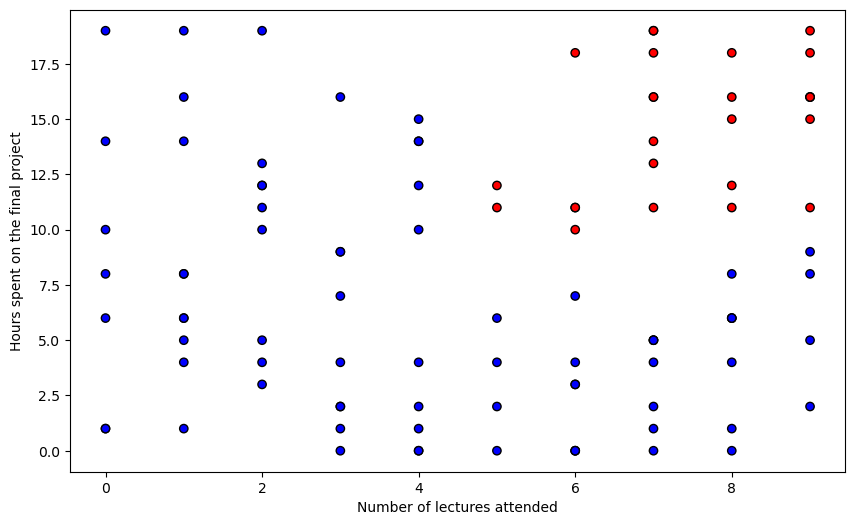

Epoch [100/1000], Loss: 0.5744
Epoch [200/1000], Loss: 0.5541
Epoch [300/1000], Loss: 0.5367
Epoch [400/1000], Loss: 0.5207
Epoch [500/1000], Loss: 0.5059
Epoch [600/1000], Loss: 0.4923
Epoch [700/1000], Loss: 0.4796
Epoch [800/1000], Loss: 0.4678
Epoch [900/1000], Loss: 0.4568
Epoch [1000/1000], Loss: 0.4466
Accuracy on test set: 95.00%


In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
num_samples = 100
x1 = np.random.randint(0, 10, size=num_samples)  # Number of lectures attended
x2 = np.random.randint(0, 20, size=num_samples)  # Hours spent on the final project
# Generate labels based on some arbitrary conditions
y = np.where((x1 >= 5) & (x2 >= 10), 1, 0)

# plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.bwr)
plt.xlabel('Number of lectures attended')
plt.ylabel('Hours spent on the final project')
plt.show()

# Split dataset into training and testing sets
x = np.column_stack((x1, x2))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension for single output
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Instantiate the model
input_size = x_train.shape[1]
model = LogisticRegression(input_size)

# Define loss function and optimizer
lossfun = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = lossfun(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    y_predicted = model(x_test_tensor)
    y_predicted_cls = y_predicted.round()  # Convert probabilities to binary predictions
    accuracy = y_predicted_cls.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])
    print(f'Accuracy on test set: {accuracy.item()*100:.2f}%')
